In [3]:
from classifier import Adaboost, DecisionStump, DataVisualizer as dv

In [11]:
from sklearn import datasets, model_selection
import numpy as np
import pandas as pd

def accuracy(y_true, y_predict):
    accuracy = np.sum(y_true == y_predict) / len(y_true)
    return accuracy    
    
data = datasets.load_digits()
X = data.data
y = data.target

digit1 = 1
digit2 = 8
idx = np.append(np.where(y == digit1)[0], np.where(y == digit2)[0])
y = data.target[idx]
# Change labels to {-1, 1}
y[y == digit1] = -1
y[y == digit2] = 1
X = data.data[idx]

    
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state = 42)

# Adaboost classification with 5 weak classifiers
clf = Adaboost()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy(y_test, y_pred)
print ("Accuracy:", accuracy)

Accuracy: 0.7640449438202247


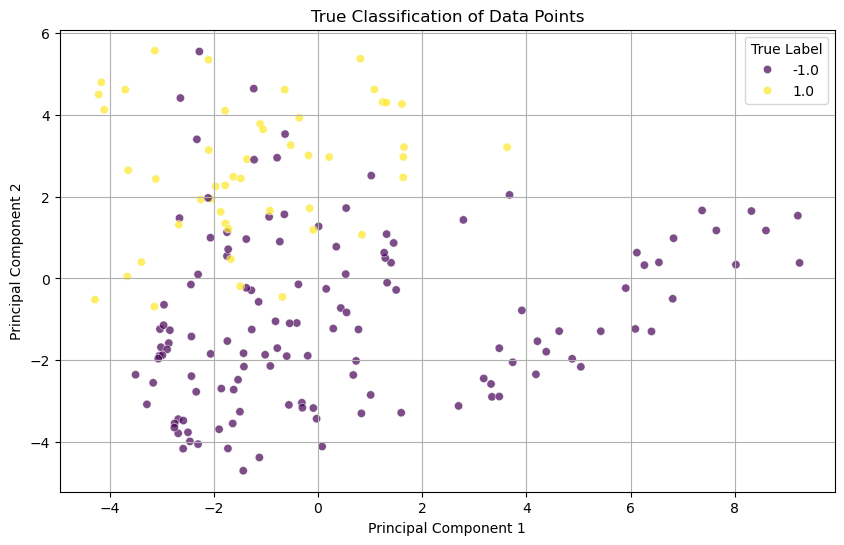

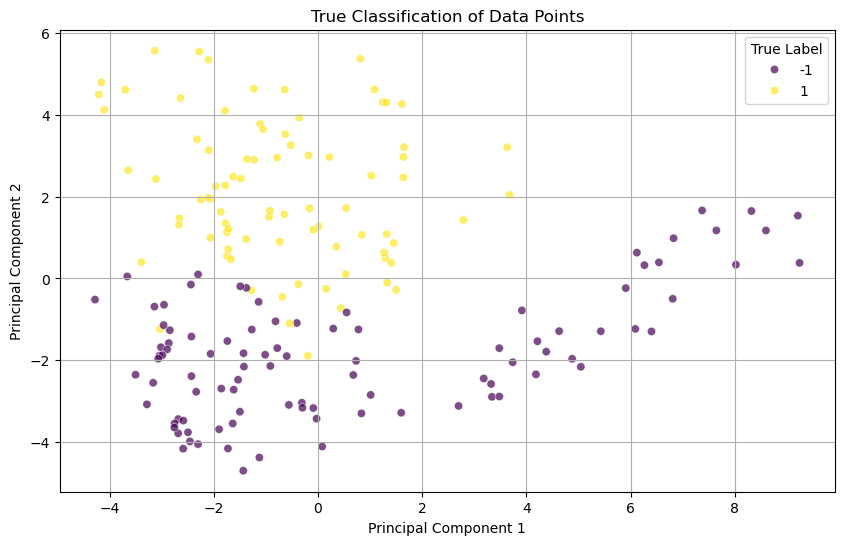

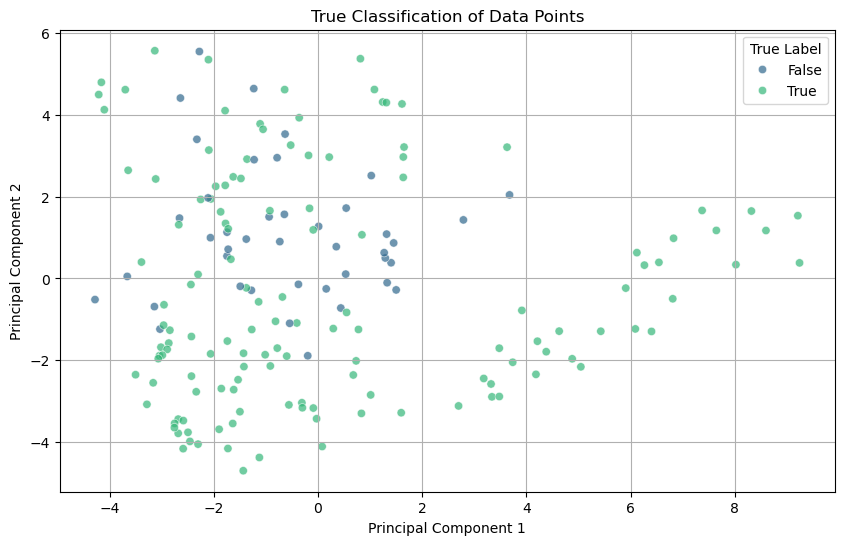

In [14]:
toVisual = dv(pd.DataFrame(X_test, columns = data.feature_names))
toVisual.plot_2d(y_pred)
toVisual.plot_2d(y_test)
toVisual.plot_2d(y_pred == y_test)